In [107]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [108]:
n_task_per_file = 50
n_files = 10
#base_dir = "toy_eg_stage1_"#
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [109]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [110]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.666667,0.857143,0.833333,1.000000,1.000000,0.833333
1,0.833333,1.000000,0.666667,0.500000,0.600000,1.000000
2,0.666667,0.500000,0.833333,0.800000,0.333333,0.833333
3,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.800000,0.800000,1.000000,0.833333,1.000000,1.000000
...,...,...,...,...,...,...
29,0.666667,1.000000,1.000000,0.800000,0.833333,1.000000
30,0.857143,1.000000,1.000000,1.000000,1.000000,0.857143
31,0.500000,1.000000,1.000000,1.000000,0.833333,0.833333
32,0.800000,0.800000,0.800000,1.000000,1.000000,1.000000


In [111]:

length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.180773,2.132294,1.271332,1.183822,1.079077,11.678977
1,1.186313,1.836796,1.311047,1.129616,1.058436,6.459992
2,1.168235,1.873739,1.284736,1.091608,1.208532,1.675180
3,1.158810,1.757305,1.314411,1.199253,1.122674,4.361920
4,1.064186,1.696513,1.243543,1.196802,1.058785,3.570376
...,...,...,...,...,...,...
29,1.211863,1.931243,1.215164,1.100264,1.162575,4.546517
30,1.253115,1.845015,1.359261,1.112096,1.250390,10.007844
31,1.154049,1.815991,1.199833,1.198595,1.182162,2.125761
32,1.092990,2.071301,1.301361,1.094722,1.119418,1.921463


In [112]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.763445,5.099341,4.691955,4.867183,6.538500,4.763445
1,4.268548,4.594842,4.786014,4.746710,5.226419,4.268548
2,4.806279,4.720261,4.637741,5.440774,5.512090,4.806279
3,5.451172,5.251753,5.195973,5.636161,4.866396,5.451172
4,3.815103,3.949075,4.084792,4.031705,5.371759,3.815103
...,...,...,...,...,...,...
29,5.257993,5.272828,4.932837,4.968084,5.331190,5.257993
30,4.057700,3.962336,3.983183,4.983852,3.903474,4.057700
31,4.605906,4.261221,4.446813,4.700070,4.856408,4.605906
32,4.740584,4.489166,4.672542,4.619164,4.643174,4.740584


In [113]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, 
                    showmeans=showmeans)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.666521
RRT(1)         0.898875
RRT(2.5)       0.870158
RRT(5)         0.876673
RRT(10)        0.892171
Tree-values    0.901811
dtype: float64
Length :
 Naive           1.177738
RRT(1)          1.957662
RRT(2.5)        1.322505
RRT(5)          1.195725
RRT(10)         1.164402
Tree-values    16.996939
dtype: float64
MSE :
 Naive          4.690902
RRT(1)         4.724786
RRT(2.5)       4.861770
RRT(5)         5.082069
RRT(10)        5.439657
Tree-values    4.690902
dtype: float64


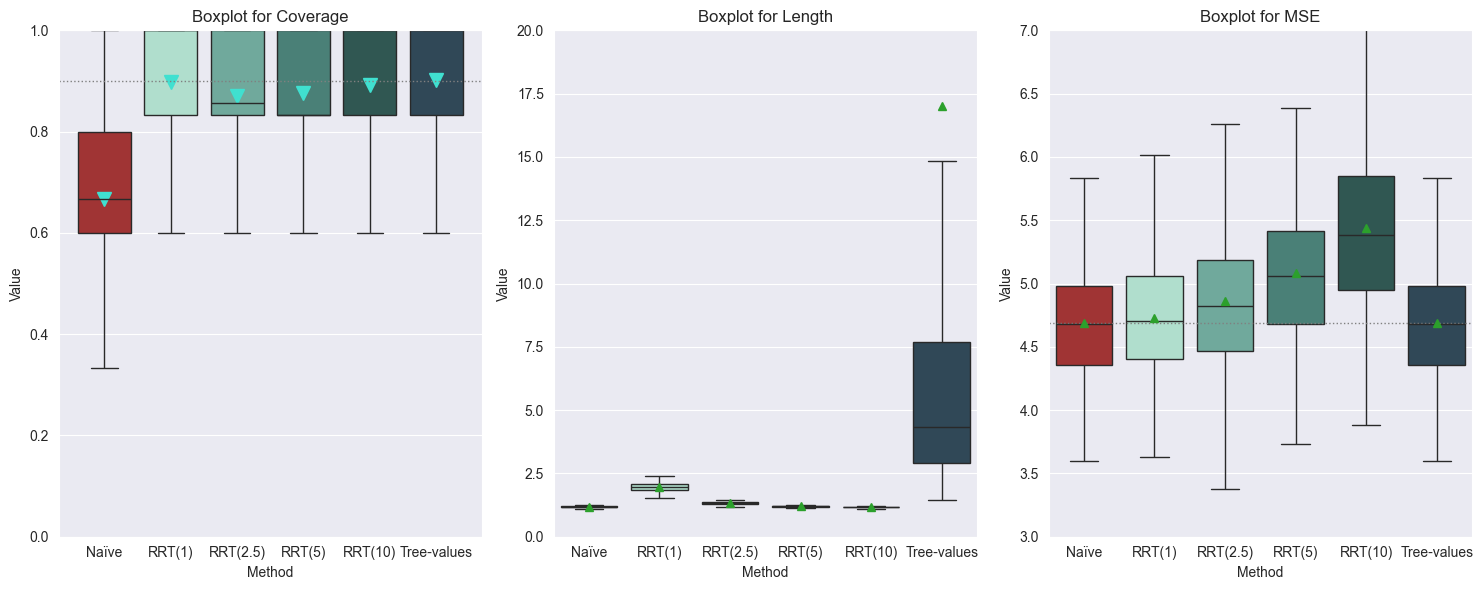

In [114]:

boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=20,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])